In [8]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from numpy import sin, cos, tan, atan, cosh, sinh, tanh, abs, linspace, min, max, argmin, argmax, pi, mean, exp, sqrt, zeros, ones, nan
import scipy
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.polynomial import chebyshev

sys.path.insert(0,'../../src/harmonic/')
sys.path.insert(0,'../../src/timesteps/')

from cswe_harm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


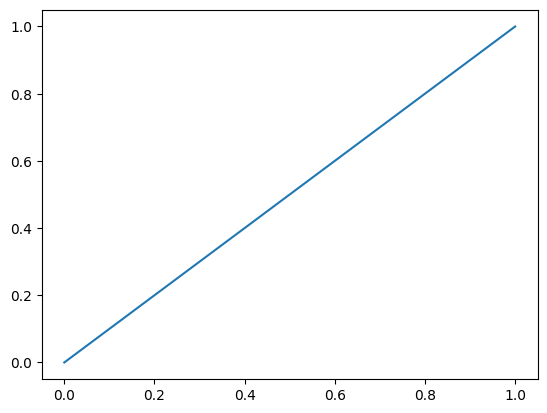

Chebyshev([-0.,  1., -0., -0., -0., -0.,  0., -0., -0., -0.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [9]:


nr_poly_coeffs = 10
degr_freedom = nr_poly_coeffs - 2

# we optimize for psi
var = 0.0
psi = np.random.randn(degr_freedom) * var


def generate_polynomial(psi, plot=False):

    poly = np.polynomial.chebyshev.Chebyshev(np.concatenate((np.array([0., 0]), psi)))

    weight_0 = - poly(-1)
    weight_1 = 1 - poly(1) - weight_0

    actual_poly = np.polynomial.chebyshev.Chebyshev(np.concatenate((np.array([weight_0, weight_1]), psi)))

    if plot:
        x = linspace(0, 1, 1000)
        plt.plot(x, (actual_poly(2 * x - 1) + 1) / 2)
        plt.show()

    # s = actual_poly.deriv().deriv()
    # print(s)
    # print(s(5))

    return actual_poly


generate_polynomial(psi, True)


In [10]:


csweharm = CSWEHarm()
csweharm.h0 = 0.1
csweharm.r = 0.1

def compute_residual(comp, psi):
    h = generate_polynomial(psi)
    h_x = h.deriv()
    h_xx = h_x.deriv()

    comp.h   = lambda x: (h(2 * x - 1) + 1) / 2
    comp.h_x = lambda x: (h_x(2 * x - 1) + 1) / 2

    comp.small_number = 1e-7
    comp.solve_LO_small_number()
    print(comp.y0.y.shape)
    comp.interpolate_LO()
    comp.small_number = 1e-5
    comp.solve_FO_small_number_interpolation_based()

    # extract u_res and u_res_x

    x = np.linspace(0, 1, 1000)
    u1_res = comp.y1.sol(x)[4]
    u1_res_x = comp.y1.sol(x, nu=1)[4]

    ideal_h_xx = comp.delta * comp.i / comp.lmbda * 5 * u1_res**4 * u1_res_x

    plt.plot(x, ideal_h_xx)
    plt.plot(x, h_xx(x))
    plt.show()

compute_residual(csweharm, psi)

    





(4, 15809)
       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [ 0.000e+00  9.910e-04 ...  1.000e+00  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001E8AF9DF840>
             p: None
             y: [[ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]
                 [ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]
                 ...
                 [ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]
                 [ 1.000e-01  1.000e-01 ...  1.000e-01  1.000e-01]]
            yp: [[-2.446e-04 -2.447e-04 ... -1.880e-03 -1.880e-03]
                 [-3.672e-03 -3.672e-03 ... -4.499e-03 -4.499e-03]
                 ...
                 [-1.016e-01 -1.017e-01 ... -5.700e+03 -1.141e+04]
                 [ 3.137e-01  3.140e-01 ...  1.568e+04  3.138e+04]]
 rms_residuals: [ 2.977e-01  2.980e-01 ...  1.937e+00  2.016e+00]
         niter: 1


SystemError: 